In [1]:
import pandas as pd

In [2]:
# 数据预处理：1、给原始数据训练集和测试集 添加表头名称
# 2、给攻击类型过多（有二十多类细分）的数据，映射成五大类
# 3、将三种离散特征编码成独热编码，并解决独热编码后的训练集和测试集特征列不相同问题（对齐）

In [3]:
# attackType_df

In [4]:
# KDDTrain_df = pd.read_csv("./KDDTrain+.txt")

In [5]:
# KDDTrain_df

In [6]:
# 读取训练集
train_file = '../KDDTrain+.txt'
train_df = pd.read_csv(train_file, header=None)


In [7]:
# 添加特征属性表头
columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type', 'difficulty_level']
train_df.columns = columns

In [8]:
# 划分训练集和测试集的标签和特征
y_train = train_df['attack_type']
X_train = train_df.drop(columns = ['attack_type'])
# y_test = test_df['attack_type']
# X_test = test_df.drop(columns = ['attack_type'])

In [9]:
X_train = X_train.drop(columns = ['num_outbound_cmds'])

In [16]:
plt.clf()

<Figure size 432x288 with 0 Axes>

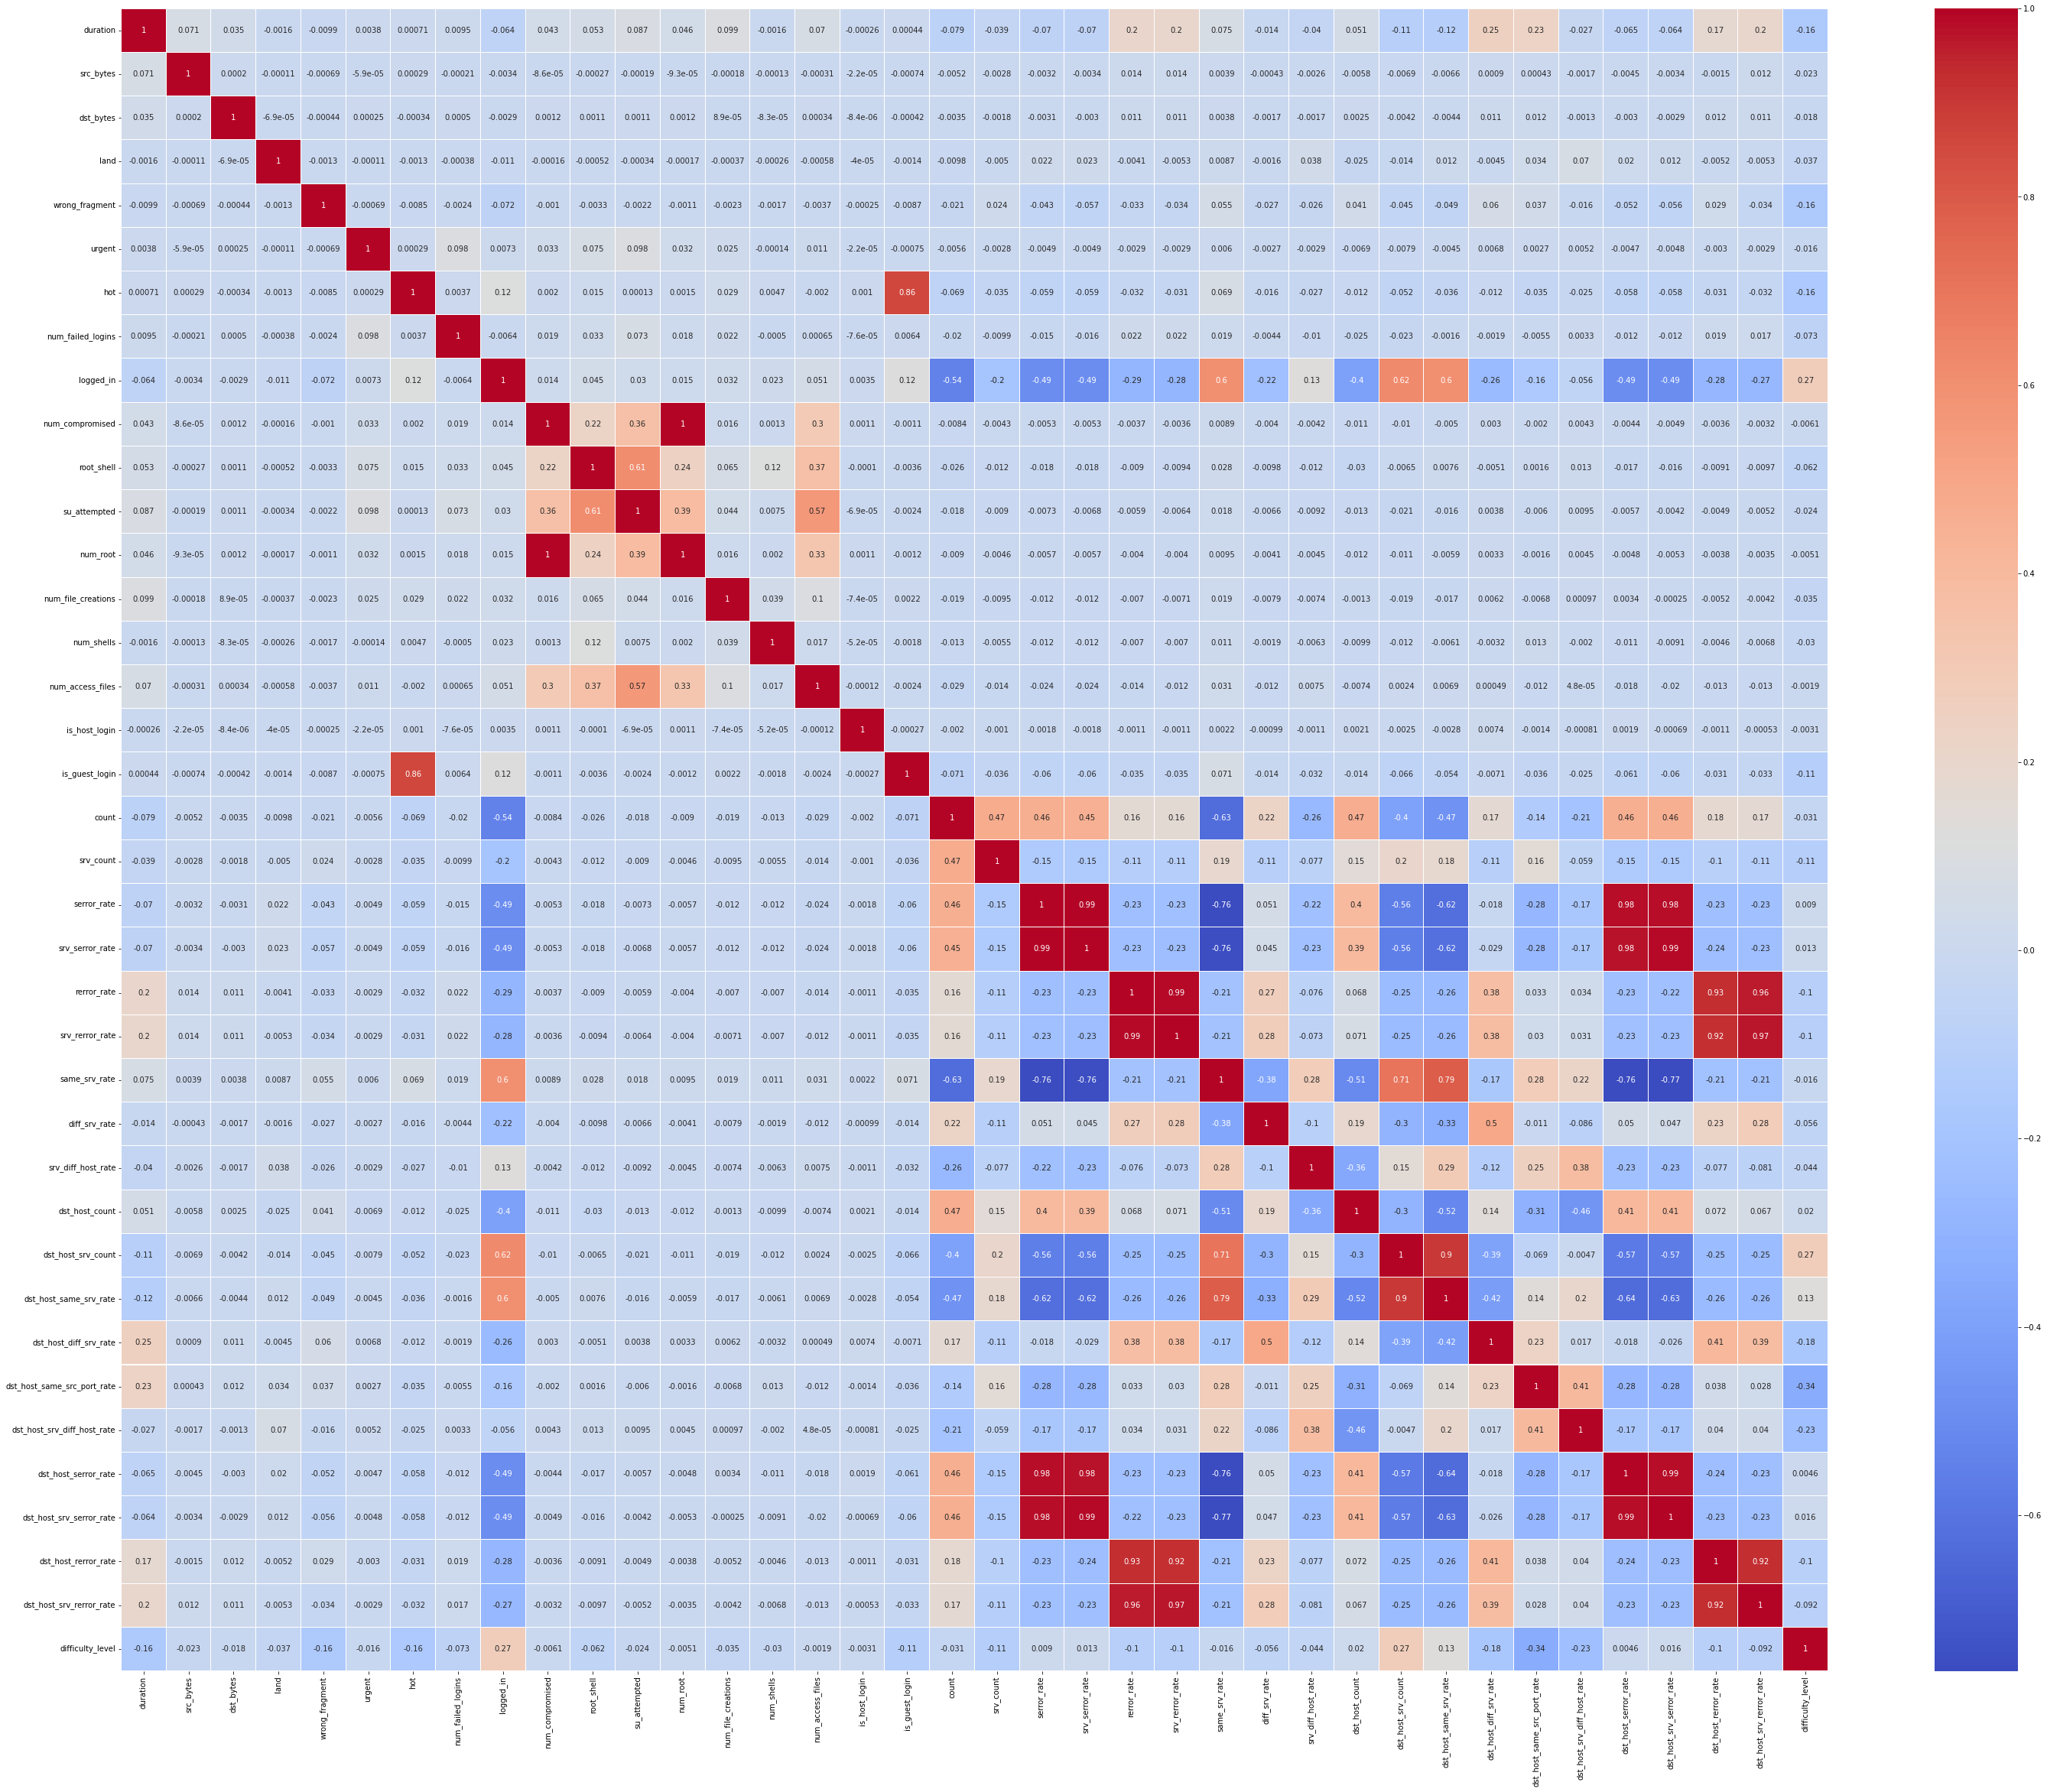

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
# plt.clf()
corr_matrix = X_train.corr()

# 使用Seaborn绘制热力图
plt.figure(figsize=(50, 40))  # 设置图像大小
sns.heatmap(corr_matrix,
            xticklabels=corr_matrix.columns.values,
            yticklabels=corr_matrix.columns.values,
            annot=True, # 显示相关系数值
            cmap='coolwarm', # 设置颜色映射
            linewidths=0.01) # 设置网格线宽度

plt.savefig('特征皮尔逊相关系数.png', dpi=400)

In [8]:
# 保存修改后的训练集文件
train_df.to_csv('KDDTrain+_withCol.csv', index=False)

In [9]:
# 读取测试集
test_file = '../KDDTest+.txt'
test_df = pd.read_csv(test_file, header=None)

In [10]:
# 添加特征属性表头
test_df.columns = columns  

# 保存修改后的测试集文件
test_df.to_csv('KDDTest+_withCol.csv', index=False)

In [11]:
train_df.head() # 可以观察到，原始的数据集已经添加了表头，各个特征的属性名（持续时间、协议类型、服务、标志、源byte数等等）

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [12]:
# print(train_df.info)
# test_df['attack_type']# 此时攻击的类型过多
test_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,difficulty_level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [13]:
# 定义攻击类型映射，此时攻击的类型过多，将其转换映射为五大类：正常，U2R,R2L,Probe,DoS；
attack_mapping = {  
    "normal": "normal",
    "apache2": "dos",  
    "back": "dos",  
    "mailbomb": "dos",  
    "processtable": "dos",  
    "snmpgetattack": "dos",  
    "teardrop": "dos",  
    "smurf": "dos",  
    "land": "dos",  
    "neptune": "dos",  
    "pod": "dos",  
    "udpstorm": "dos",  
    "ps": "u2r",  
    "buffer_overflow": "u2r",  
    "perl": "u2r",  
    "rootkit": "u2r",  
    "loadmodule": "u2r",  
    "xterm": "u2r",  
    "sqlattack": "u2r",  
    "httptunnel": "u2r",  
    "ftp_write": "r2l",  
    "guess_passwd": "r2l",  
    "snmpguess": "r2l",  
    "imap": "r2l",  
    "spy": "r2l",  
    "warezclient": "r2l",  
    "warezmaster": "r2l",  
    "multihop": "r2l",  
    "phf": "r2l",  
    "named": "r2l",  
    "sendmail": "r2l",  
    "xlock": "r2l",  
    "xsnoop": "r2l",  
    "worm": "r2l",  
    "nmap": "probe",  
    "ipsweep": "probe",   
    "portsweep": "probe",   
    "satan": "probe",     
    "mscan": "probe",    
    "saint": "probe" 
}



# 将攻击类型映射转换为五大类
train_df['attack_type'] = train_df['attack_type'].map(attack_mapping)
test_df['attack_type'] = test_df['attack_type'].map(attack_mapping)

In [14]:
test_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,difficulty_level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,dos,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,dos,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,probe,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,probe,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,dos,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [15]:
train_df# 可以看到，成功地把多种攻击类型归类到上述5类的攻击类型中，之后的分类就是对这五类。

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,dos,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos,20


In [16]:
# 数据的特征中含有一些离散的类别特征，例如协议类型（三种tcp udp icmp）、服务、flag，需要数值化，而为了避免权重
# 需要进行独热编码

# 对protocol_type特征进行独热编码
# train_df.iloc[:, 1]表示对训练集的下标为1的特征也就是协议类型， prefix="protocol_type”表示独热编码属性名的前缀
# get dummies 可以将这一列作为独热编码
protocol_type_train = pd.get_dummies(train_df.iloc[:, 1], prefix="protocol_type")
protocol_type_test = pd.get_dummies(test_df.iloc[:, 1], prefix="protocol_type")

# 对service特征进行独热编码
service_train = pd.get_dummies(train_df.iloc[:, 2], prefix="service")
service_test = pd.get_dummies(test_df.iloc[:, 2], prefix="service")

# 对flag特征进行独热编码
flag_train = pd.get_dummies(train_df.iloc[:, 3], prefix="flag")
flag_test = pd.get_dummies(test_df.iloc[:, 3], prefix="flag")

# 将独热编码后的特征拼接到原始数据集中
train_df = pd.concat([train_df, protocol_type_train, service_train, flag_train], axis=1)
test_df = pd.concat([test_df, protocol_type_test, service_test, flag_test], axis=1)


# 此时的训练集和测试集还需要去除原来的协议类型、服务标志等特征，只留下转换成独热编码的这几个特征；
train_df  = train_df.drop(train_df.columns[[1,2,3]], axis = 1) #train_df是一个DataFrame，columns=[1, 2, 3]表示要删除的列的列号，即第2列、第3列和第4列（从0开始计数）。
# inplace=True表示在原DataFrame上直接进行修改，而不是返回一个新的DataFrame。
test_df  = test_df.drop(test_df.columns[[1,2,3]],axis = 1)

In [17]:
# flag_train# 表示的是flag这一个特征的独热编码，总共有十一类情况
train_df.columns[100]
# test_df.head()
flag_train

,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,1,0,0,0,0,0
125969,0,0,0,0,0,0,0,0,0,1,0
125970,0,0,0,0,0,0,0,0,0,1,0
125971,0,0,0,0,0,1,0,0,0,0,0


In [18]:
test_df.columns[100]

'service_tim_i'

In [19]:
# 发现变成独热编码后，测试集和训练集的特征列在独热编码的部分不完全对应，需要进行对齐
# 对齐方式：按列对齐axis = 1 ，左连接，即按照训练集中有的列为对齐标准
train_df, test_df =  train_df.align(test_df ,join = 'left',axis=1)

In [20]:
# 发现对齐之后的数据，会存在NaN，需要将NaN转换为False，否则无法进行训练
train_df.fillna(0, inplace=True)
test_df.fillna(0, inplace=True)

In [21]:
# 将处理好的数据转化成csv
train_df.to_csv("KDDTrain+afterP.csv",index = False)
test_df.to_csv("KDDTest+afterP.csv",index = False)

# 此时对数据进行了预处理，但是没有处理类别不平衡问题

In [22]:
y_test = test_df['attack_type']
from collections import Counter
num = Counter(y_test)
print(num)

Counter({'normal': 9711, 'dos': 7636, 'r2l': 2576, 'probe': 2421, 'u2r': 200})
